___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Linear Regression Project Exercise - Solutions

Now that we have learned about feature engineering, cross validation, and grid search, let's test all your new skills with a project exercise in Machine Learning. This exercise will have a more guided approach, later on the ML projects will begin to be more open-ended. We'll start off with using the final version of the Ames Housing dataset we worked on through the feature engineering section of the course. Your goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

---
---
---
## Complete the tasks in bold

**TASK: Run the cells under the Imports and Data section to make sure you have imported the correct general libraries as well as the correct datasets. Later on you may need to run further imports from scikit-learn.**

### Imports

In [100]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

### Data

In [101]:
df = pd.read_csv("AMES_Final_DF.csv")

In [102]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_At

In [103]:
df.shape

(2925, 274)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


**TASK: The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

In [105]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

**TASK: Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 101**

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()**

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [111]:
pd.DataFrame(scaled_X_train, columns=X_train.columns).head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_None,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,Bsmt Exposure_None,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_None,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_None,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garag

In [112]:
from sklearn.linear_model import Lasso, LassoCV

In [113]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [114]:
# default alpha=1
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9167882218682459
Mean Absolute Error(MAE): 14578.988330097474
Mean Square Error(MSE): 434040646.5801559
Root Mean Square Error(RMSE): 20833.642182301104


In [115]:
y.mean()

180815.53743589742

In [116]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)

In [117]:
# ideal alpha
lasso_cv_model.alpha_

14.720408163265306

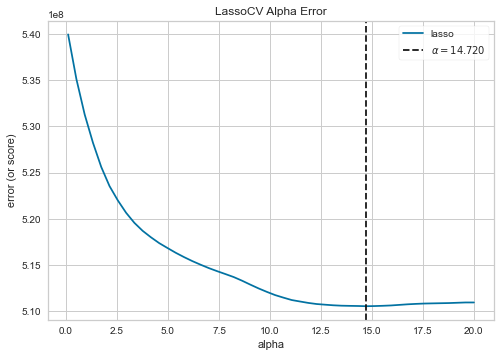

In [118]:
# Visualization of optimum alpha with yellowbrick for LASSO Regression

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 50)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

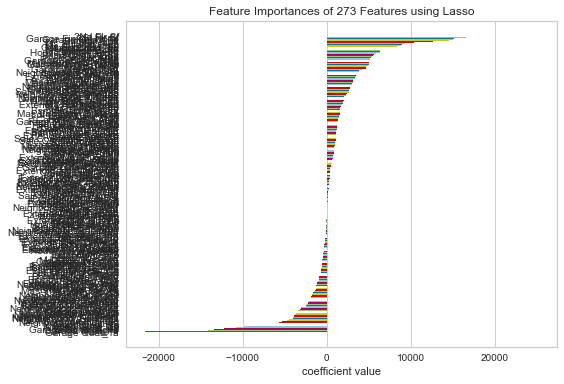

In [119]:
# Visualization of 'Feature Importance' of Features using LASSO Regression via yellowbrick 

from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();

In [120]:
lasso_model = Lasso(15).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9217605749173204
Mean Absolute Error(MAE): 14200.737095510769
Mean Square Error(MSE): 408104374.3251885
Root Mean Square Error(RMSE): 20201.593361049236


In [121]:
lasso_model = Lasso(50).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9257650804237839
Mean Absolute Error(MAE): 14193.202360059271
Mean Square Error(MSE): 387216488.0393416
Root Mean Square Error(RMSE): 19677.817156365225


In [122]:
lasso_model = Lasso(14.72).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9217095502199781
Mean Absolute Error(MAE): 14202.808324647727
Mean Square Error(MSE): 408370524.05931586
Root Mean Square Error(RMSE): 20208.17963249822


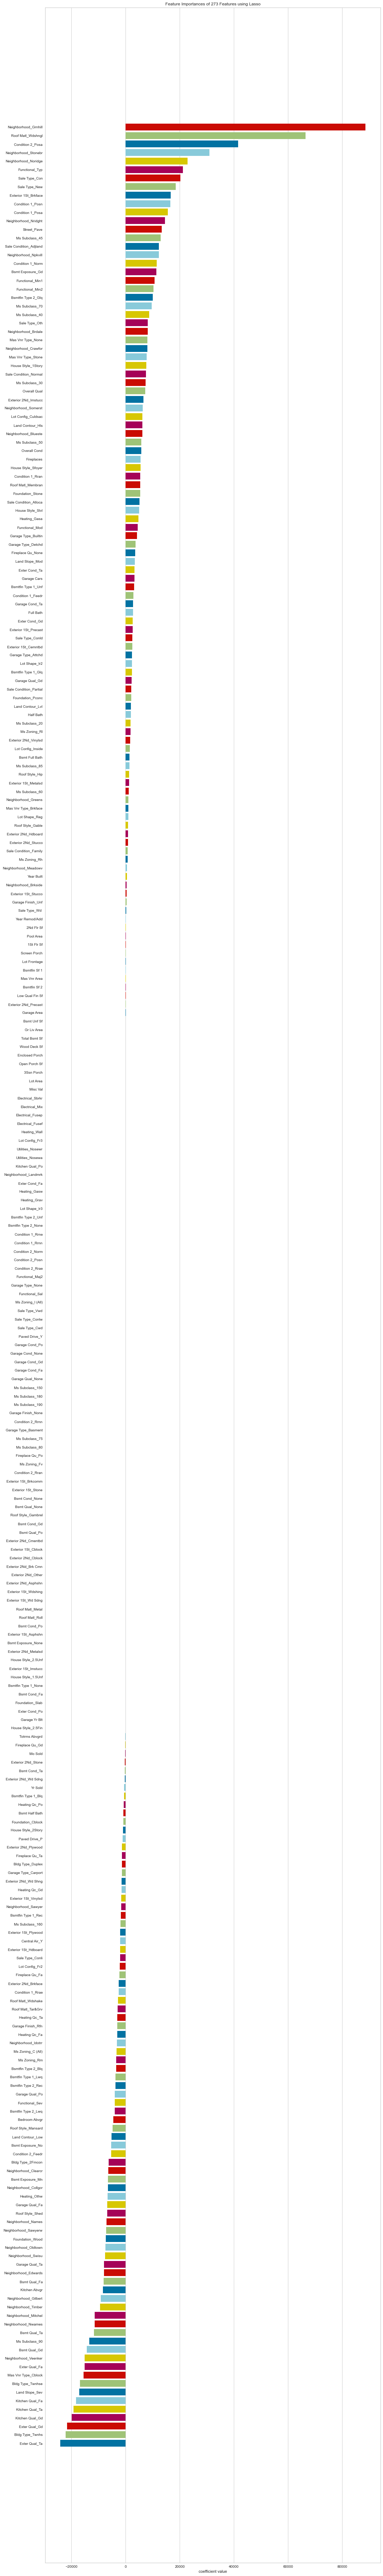

<AxesSubplot:title={'center':'Feature Importances of 273 Features using Lasso'}, xlabel='coefficient value'>

In [123]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [124]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

200

In [125]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
80,Neighborhood_GrnHill,88512.380622
134,Roof Matl_WdShngl,66404.155592
108,Condition 2_PosA,41572.526055
95,Neighborhood_StoneBr,30989.399379
88,Neighborhood_NoRidge,22878.763228
...,...,...
225,Kitchen Qual_TA,-19220.397630
223,Kitchen Qual_Gd,-19857.431447
171,Exter Qual_Gd,-21616.410004
115,Bldg Type_Twnhs,-22185.492418


In [126]:
significant_features["features"]

0                Lot Frontage
1                    Lot Area
2                Overall Qual
3                Overall Cond
4                  Year Built
                ...          
268    Sale Condition_AdjLand
269     Sale Condition_Alloca
270     Sale Condition_Family
271     Sale Condition_Normal
272    Sale Condition_Partial
Name: features, Length: 200, dtype: object

In [127]:
X_new=X[significant_features.features]

In [128]:
X_new.shape

(2925, 200)

In [129]:
y.shape

(2925,)

In [130]:
X_new.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS SubClass_160,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 2_Feedr,Condition 2_PosA,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1Story,House Style_2.5Fin,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 2nd_BrkFace,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Gd,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_TA,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,Heating_GasA,Heating_OthW,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_TA,Paved Drive_P,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

**Linear Regression with reduced columns**

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [133]:
y_pred = model.predict(X_test)

In [134]:
eval_metrics(y_test, y_pred)

R2 Score: 0.9206526409603205
Mean Absolute Error(MAE): 14940.033762304209
Mean Square Error(MSE): 488315304.0550522
Root Mean Square Error(RMSE): 22097.857453949066


**Linear Regression with original columns**

In [135]:
#let's try the linear reg with original dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9132021061163828
Mean Absolute Error(MAE): 15745.198488637538
Mean Square Error(MSE): 534166990.0055685
Root Mean Square Error(RMSE): 23112.05291629388


**Polynomial Regression with Reduced Columns**

In [136]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X_new)
poly_features.shape

(2925, 20300)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: -16.148448537597634
Mean Absolute Error(MAE): 145510.5289392509
Mean Square Error(MSE): 106196973756.04095
Root Mean Square Error(RMSE): 325878.77156396816


**Lasso with Reduced Columns**

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9215115217754782
Mean Absolute Error(MAE): 14905.531181435854
Mean Square Error(MSE): 483029625.3446736
Root Mean Square Error(RMSE): 21977.934965430068


In [139]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(X_train, y_train)
lasso_cv_model.alpha_

8.628571428571428

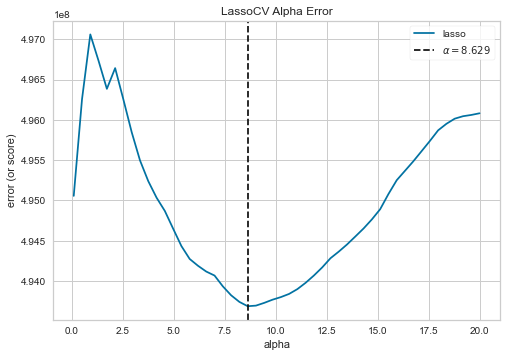

In [140]:
# Visualization of optimum alpha with yellowbrick for LASSO Regression

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 50)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

In [141]:
lasso_model = Lasso(7.41).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9276601461857701
Mean Absolute Error(MAE): 14440.423381234323
Mean Square Error(MSE): 445190087.45998454
Root Mean Square Error(RMSE): 21099.52813358594


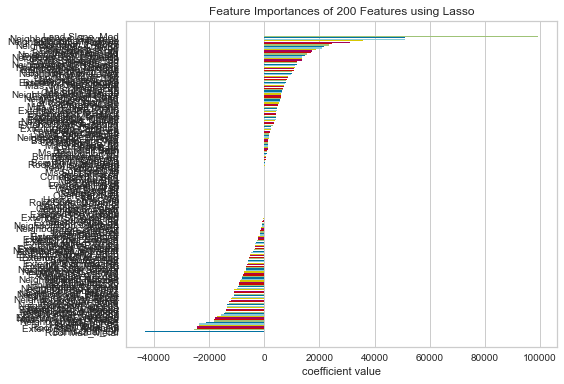

In [142]:
# Visualization of 'Feature Importance' of Features using LASSO Regression via yellowbrick 

from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();